This is a workbook analysing StackOverflow Yearly Survey Results

In [4]:
# Loading libraries

import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
# %matplotlip inline

# libraries
import numpy as np
import matplotlib.pyplot as plt


from scipy.stats import ttest_ind # library to perform t-test

In [5]:
# loading data

df = pd.read_csv('survey-results-public.csv')
df.shape

(51392, 154)

In [6]:
# remove rows with no gender information

df = df.dropna(subset = ['Gender'], axis = 0)
df.shape

(35047, 154)

In [9]:
# number of records by gender
df['Gender'].value_counts()

# re-categorise gender field to 'Male', 'Female' and 'Other'
df['Gender'] = np.where(df.Gender == 'Male', 'Male', np.where(df.Gender == 'Female', 'Female', 'Others'))

Male      31589
Female     2600
Others      858
Name: Gender, dtype: int64
Male      0.901332
Female    0.074186
Others    0.024481
Name: Gender, dtype: float64


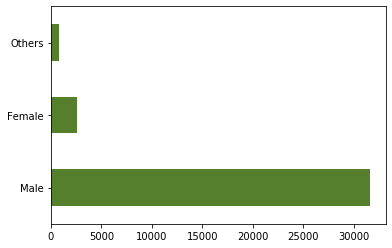

In [92]:
# Simple distribution of Gender Category
print(df['Gender'].value_counts())
print(df['Gender'].value_counts()/df.shape[0])

(df['Gender'].value_counts()).plot(kind = 'barh', color='#557f2d')

In [17]:
print("The % of male survey respondents was {:.2f}".format(sum(df.Gender == 'Male')/df.shape[0]))
print("The % of female survey respondenst was {:.2f}".format(sum(df.Gender == 'Female')/df.shape[0]))

The % of male survey respondents was 0.90
The % of female survey respondenst was 0.07


## Female Rate by Country

In [81]:
#  selecting only countries with at least 1% of all respondents

df_countries = ((df.groupby(['Country'])['Respondent'].count().sort_values(ascending = False)/df.shape[0])>=.01).reset_index()
df_countries = df_countries[df_countries.Respondent == True]

# create a df with only a subset of countries
list_countries = list(df_countries.iloc[:, 0])

subset_df = df[df['Country'].isin(list_countries)]

# print the count by gender
print(subset_df['Gender'].value_counts())

Male      24053
Female     2068
Others      654
Name: Gender, dtype: int64


In [156]:
subset_df.groupby(['Country'])['Respondent'].count().sort_values(ascending= False)

Country
United States         8546
United Kingdom        3259
Germany               2962
India                 2672
Canada                1630
France                1184
Poland                 933
Australia              702
Netherlands            637
Russian Federation     591
Spain                  571
Italy                  537
Brazil                 523
Sweden                 448
Switzerland            427
Romania                403
Israel                 392
Austria                358
Name: Respondent, dtype: int64

In [141]:
# Country and Gender and % of total
groups = subset_df.groupby(['Country', 'Gender'])['Respondent'].count()/subset_df.groupby(['Country'])['Respondent'].count()
groups = groups.reset_index()
groups

,Country,Gender,Respondent
0,Australia,Female,0.056980
1,Australia,Male,0.903134
2,Australia,Others,0.039886
3,Austria,Female,0.064246
4,Austria,Male,0.899441
5,Austria,Others,0.036313
6,Brazil,Female,0.047801
7,Brazil,Male,0.938815
8,Brazil,Others,0.013384
9,Canada,Female,0.092025


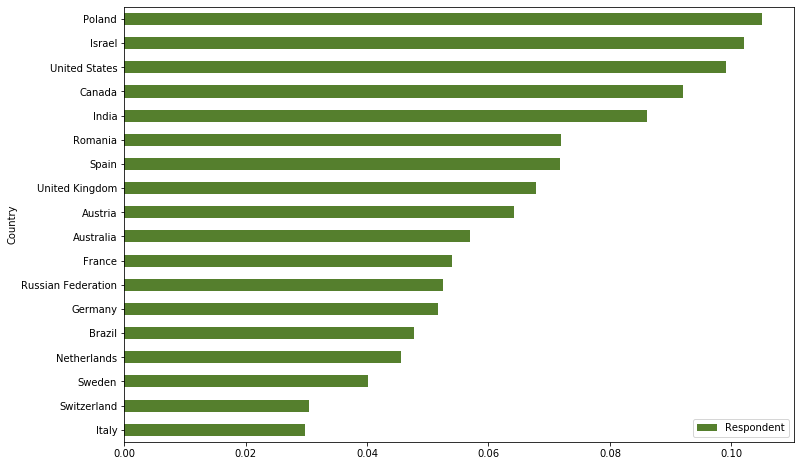

In [139]:
# female respondents as a proportion of all respondents in a country
groups[groups.Gender == 'Female'].sort_values(by = 'Respondent').set_index('Country').plot(kind = 'barh', figsize = (12,8), color='#557f2d')

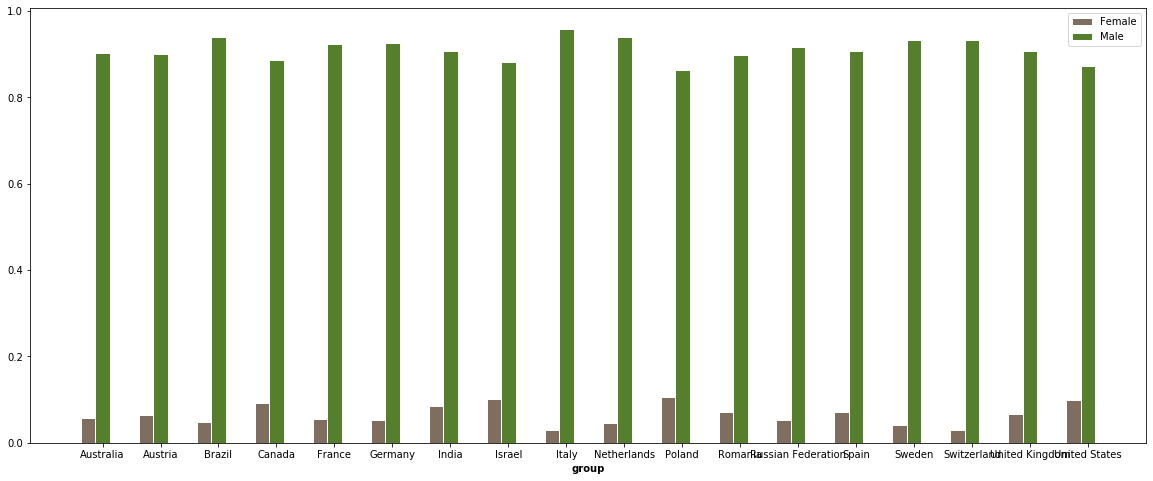

In [123]:
plt.figure(figsize=(20,8))
 
# set width of bar
barWidth = 0.25
 
# set height of bar
bars1 = list(groups[groups.Gender == 'Female']['Respondent'])
bars2 = list(groups[groups.Gender == 'Male']['Respondent'])
 
# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
 
# Make the plot
plt.bar(r1, bars1, color='#7f6d5f', width=barWidth, edgecolor='white', label='Female')
plt.bar(r2, bars2, color='#557f2d', width=barWidth, edgecolor='white', label='Male')
 
# Add xticks on the middle of the group bars
plt.xlabel('group', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bars1))], sorted(list(set(groups['Country']))))
 
# Create legend & Show graphic
plt.legend()
plt.show()


## Gender and Career

In [147]:
def prepare_df(df, column):
    """Make sure that the selected column in the df has no NaN values"""
    df = df.dropna(subset = [column], axis = 0)
    return df

In [150]:
test_list = ['JobSatisfaction', 'CareerSatisfaction']

In [ ]:
def run_ttest()

In [53]:
df_JS = df.dropna(subset = ['JobSatisfaction'], axis = 0)
df_JS.groupby('Gender')['JobSatisfaction'].mean()


cat1 = df_JS[df_JS['Gender']=='Male']
cat2 =df_JS[df_JS['Gender']=='Female']

ttest_ind(cat1['JobSatisfaction'], cat2['JobSatisfaction'])
# >>> (1.4927289925706944, 0.16970867501294376)

Ttest_indResult(statistic=1.413235478252994, pvalue=0.1575974447262672)

In [65]:
df_CS = df.dropna(subset = ['CareerSatisfaction'], axis = 0)
print(df_CS.groupby('Gender')['CareerSatisfaction'].mean())

cat1 = df_CS[df_CS['Gender']=='Male']
cat2 =df_CS[df_CS['Gender']=='Female']

ttest_ind(cat1['CareerSatisfaction'], cat2['CareerSatisfaction'])

Gender
Female    7.185069
Male      7.394061
Name: CareerSatisfaction, dtype: float64


Ttest_indResult(statistic=5.093512998370622, pvalue=3.536284963624364e-07)

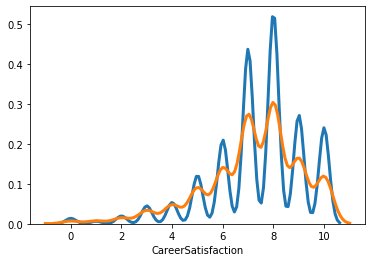

In [90]:
x1 = df_CS.loc[df_CS.Gender == 'Male', 'CareerSatisfaction']
x2 = df_CS.loc[df_CS.Gender == 'Female', 'CareerSatisfaction']
# x3 = df.loc[df.cut=='Good', 'depth']

# Draw the density plot
sns.distplot(x1, hist = False, kde = True,kde_kws = {'linewidth': 3})
sns.distplot(x2, hist = False, kde = True,kde_kws = {'linewidth': 3})

In [87]:
x2

8         8.0
10        8.0
73       10.0
111       7.0
143       5.0
         ... 
34113    10.0
34121     7.0
34150     8.0
34159     8.0
34183     7.0
Name: CareerSatisfaction, Length: 2237, dtype: float64

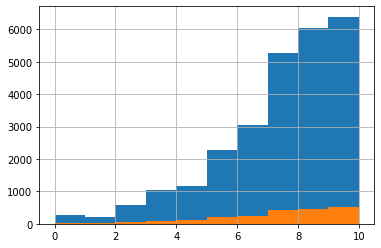

In [70]:
df_CS[df_CS['Gender']== 'Male']['JobSatisfaction'].hist()
df_CS[df_CS['Gender']== 'Female']['JobSatisfaction'].hist()

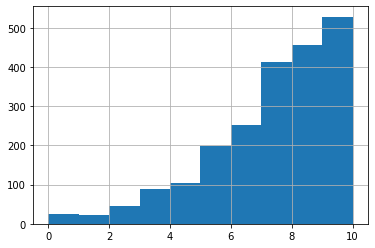

In [91]:
df_CS[df_CS['Gender']== 'Female']['JobSatisfaction'].hist()

In [96]:
df_CS = df.dropna(subset = ['Salary'], axis = 0)
print(df_CS.groupby('Gender')['Salary'].mean())

cat1 = df_CS[df_CS['Gender']=='Male']
cat2 =df_CS[df_CS['Gender']=='Female']

ttest_ind(cat1['Salary'], cat2['Salary'])

Gender
Female    58083.924534
Male      56996.494293
Name: Salary, dtype: float64


Ttest_indResult(statistic=-0.7564769929054644, pvalue=0.4493787807516285)

In [101]:
df_CS = df.dropna(subset = ['FormalEducation', 'JobSatisfaction'], axis = 0)
print(df_CS.groupby(['Gender', 'FormalEducation'])['JobSatisfaction'].mean())

Gender  FormalEducation                                                  
Female  Bachelor's degree                                                    6.988596
        Doctoral degree                                                      7.387097
        I never completed any formal education                               4.500000
        I prefer not to answer                                               6.500000
        Master's degree                                                      6.765650
        Primary/elementary school                                            6.000000
        Professional degree                                                  6.851852
        Secondary school                                                     6.978723
        Some college/university study without earning a bachelor's degree    7.021390
Male    Bachelor's degree                                                    6.910739
        Doctoral degree                                           

In [102]:
df_CS = df.dropna(subset = ['FormalEducation', 'Salary'], axis = 0)
print(df_CS.groupby(['Gender', 'FormalEducation'])['Salary'].mean())

Gender  FormalEducation                                                  
Female  Bachelor's degree                                                    60040.908291
        Doctoral degree                                                      90623.768006
        I prefer not to answer                                               13255.786387
        Master's degree                                                      56210.867588
        Primary/elementary school                                            32258.064516
        Professional degree                                                  45458.307618
        Secondary school                                                     41110.162320
        Some college/university study without earning a bachelor's degree    48116.699754
Male    Bachelor's degree                                                    57413.518034
        Doctoral degree                                                      76872.602904
        I never completed 

Gender  EmploymentStatus                                    
Female  Employed full-time                                       1998
        Employed part-time                                        167
        I prefer not to say                                        28
        Independent contractor, freelancer, or self-employed      164
        Not employed, and not looking for work                     81
        Not employed, but looking for work                        154
        Retired                                                     8
Male    Employed full-time                                      22940
        Employed part-time                                       1817
        I prefer not to say                                       350
        Independent contractor, freelancer, or self-employed     3508
        Not employed, and not looking for work                   1441
        Not employed, but looking for work                       1447
        Retired              

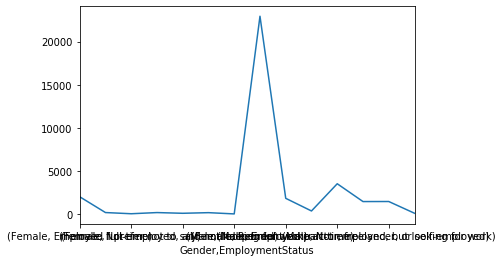

In [106]:
df_CS = df.dropna(subset = ["EmploymentStatus"], axis = 0)
print(df_CS.groupby(['Gender', 'EmploymentStatus'])['Respondent'].count())
df_CS.groupby(['Gender', 'EmploymentStatus'])['Respondent'].count().plot()